<a href="https://colab.research.google.com/github/poddardelhi/Credit_modeller/blob/main/Credit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive #comment it out if you're importing the data locally
drive.mount('/content/drive') #comment it out if you're importing the data locally
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Modules are imported.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Modules are imported.


In [28]:
df = pd.read_excel(io="/content/drive/MyDrive/Colab Notebooks/credit_risk_modeller/home-task-1-.xlsx",sheet_name="Applications_Decided_On")


In [4]:
df.head()

,Client_No,Monthly_Income,Years_Worked,Obligations,Got_Approval
0,1,969.961189,8.754713,YES,NO
1,2,955.062497,6.405082,NO,NO
2,3,1157.539444,1.436116,YES,NO
3,5,1330.892070,7.477707,YES,YES
4,7,1557.596072,14.442906,NO,YES


In [9]:
def check_data (df) -> pd.DataFrame:
  null_count= df.isnull().sum()
  nan_count = df.isna().sum()
  duplicates = df.duplicated(keep=False).value_counts(normalize= True)
  check_data_table = pd.concat([null_count, nan_count], axis=1, keys= ['null_count', 'nan_count'])
  return check_data_table


In [10]:
check_data(df)

,null_count,nan_count
Client_No,0,0
Monthly_Income,0,0
Years_Worked,0,0
Obligations,0,0
Got_Approval,0,0


In [12]:
df.duplicated(subset=['Client_No'],keep=False).value_counts(normalize= True) *100

False    100.0
dtype: float64

In [29]:
from pandas.io.formats.format import decimal
def format(df) -> pd.DataFrame:
  df_formatted = df.copy()
  df_formatted[['Monthly_Income','Years_Worked']] = df_formatted[['Monthly_Income','Years_Worked']].round(decimals=0)
  df_formatted['Obligations']= df_formatted['Obligations'].map({'YES':1, 'NO':0})
  df_formatted['Got_Approval']= df_formatted['Got_Approval'].map({'YES':1, 'NO':0})
  return df_formatted
df_formatted = format(df)

In [35]:
df_formatted.head()

,Client_No,Monthly_Income,Years_Worked,Obligations,Got_Approval
0,1,970.0,9.0,1,0
1,2,955.0,6.0,0,0
2,3,1158.0,1.0,1,0
3,5,1331.0,7.0,1,1
4,7,1558.0,14.0,0,1


In [37]:
df_formatted.describe()

,Client_No,Monthly_Income,Years_Worked,Obligations,Got_Approval
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1500.056000,1200.523500,8.042000,0.555500,0.457500
std,862.199081,296.479374,4.029684,0.497034,0.498315
min,1.000000,500.000000,1.000000,0.000000,0.000000
25%,755.750000,994.750000,5.000000,0.000000,0.000000
50%,1511.500000,1193.000000,8.000000,1.000000,0.000000
75%,2233.250000,1407.250000,12.000000,1.000000,1.000000
max,2997.000000,2220.000000,15.000000,1.000000,1.000000


In [44]:
from IPython.core.hooks import pre_run_code_hook
# Feature scaling and training data split
from sklearn.preprocessing import StandardScaler
df_training_data= df_formatted.drop(columns=['Client_No'])
scaler = StandardScaler()
X = df_training_data.drop(columns=['Got_Approval'])
Y = df_training_data['Got_Approval']
# Select only the numerical columns
numerical_cols = ['Monthly_Income', 'Years_Worked']

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Print the scaled feature variable of (X) and target variable (Y)
print ('Scaled feature variable (X) \n')
print(X.head())

print ("\n Target variable (Y)\n")
print (Y.head())

Scaled feature variable (X) 

   Monthly_Income  Years_Worked  Obligations
0       -0.777731      0.237795            1
1       -0.828337     -0.506866            0
2       -0.143464     -1.747969            1
3        0.440196     -0.258646            1
4        1.206040      1.478898            0

 Target variable (Y)

0    0
1    0
2    0
3    1
4    1
Name: Got_Approval, dtype: int64


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 110)

In [47]:
Y_train

388     0
199     0
134     0
1497    0
1228    1
       ..
381     0
1295    0
61      1
1763    1
128     1
Name: Got_Approval, Length: 1600, dtype: int64

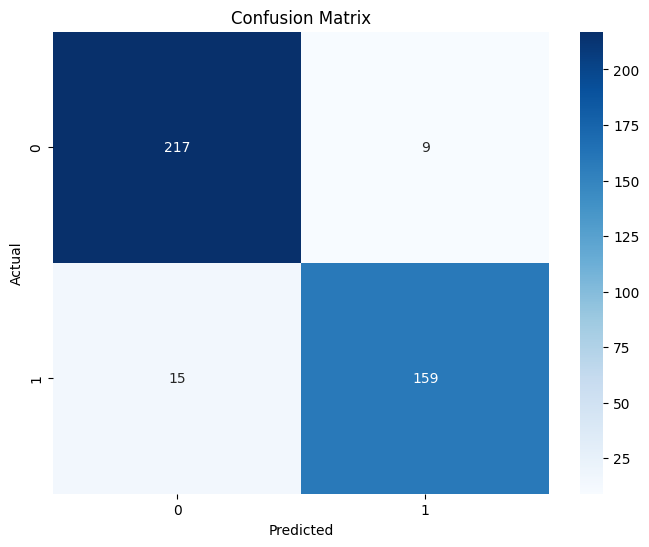

Accuracy: 0.94
Precision: 0.9401662561576355
Recall: 0.94
F1 Score: 0.939866697310963
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       226
           1       0.95      0.91      0.93       174

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

logistic_reg = LogisticRegression(random_state=110)

# Train the logistic regression model
logistic_reg.fit(X_train, Y_train)

# Predit on the test set
Y_predict = logistic_reg.predict (X_test)

# Calculate the accuracy
accuracy = accuracy_score (Y_test, Y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, Y_predict, average='weighted')
recall = recall_score(Y_test, Y_predict, average='weighted')
f1 = f1_score(Y_test, Y_predict, average='weighted')

# Generate a classification report
classification_rep = classification_report(Y_test, Y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)
